In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.math import confusion_matrix

In [ ]:
data_frame = pd.read_csv('/content/Churn_Modelling.csv')
data_frame.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
data_frame.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_frame = pd.get_dummies(data_frame, columns=['Geography', 'Gender'])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
scaler = StandardScaler()
data_frame['CreditScore'] = scaler.fit_transform(data_frame[['CreditScore']])
data_frame['Age'] = scaler.fit_transform(data_frame[['Age']])
data_frame['Balance'] = scaler.fit_transform(data_frame[['Balance']])
data_frame['EstimatedSalary'] = scaler.fit_transform(data_frame[['EstimatedSalary']])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,0,1,1,0


In [ ]:
X = data_frame.drop('Exited', axis='columns')
y = data_frame['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(f'Training shapes: {X_train.shape}, {y_train.shape}')
print(f'Testing shapes: {X_test.shape}, {y_test.shape}')

Training shapes: (8000, 13), (8000,)
Testing shapes: (2000, 13), (2000,)


In [ ]:
model = Sequential(
    [
        Dense(64, input_shape=(X_train.shape[1], ), activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(4, activation='relu'),
        Dropout(0.1),
        Dense(2, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 2s 2ms/step - loss: 0.6606 - accuracy: 0.7866
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.8000
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.8000
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8000
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.8000
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.8000
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.8000
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8000
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.8000
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5016 - accura

In [ ]:
y_pred = np.round(model.predict(X_test).reshape(-1))

63/63 [==============================] - 0s 967us/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1563
           1       0.77      0.47      0.59       437

    accuracy                           0.85      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.85      0.84      2000



In [ ]:
cm = confusion_matrix(y_test, )

<Axes: >

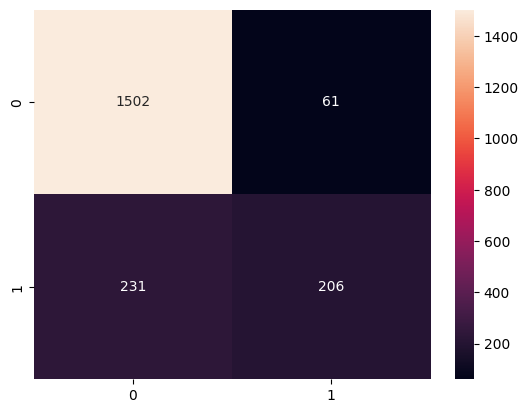

In [ ]:
sn.heatmap(cm, annot=True, fmt='d')